# Глава 8

## Задания 8.1 - 8.2.

Используя интерактивный виджет, поэкспериментировать с параметрами гауссова окна и изучить их влияние на частоту среза. Определить что случится, если при увеличении ширины гауссова окна std не увеличивать число элементов в окне M и что происходит с преобразованем Фурье.

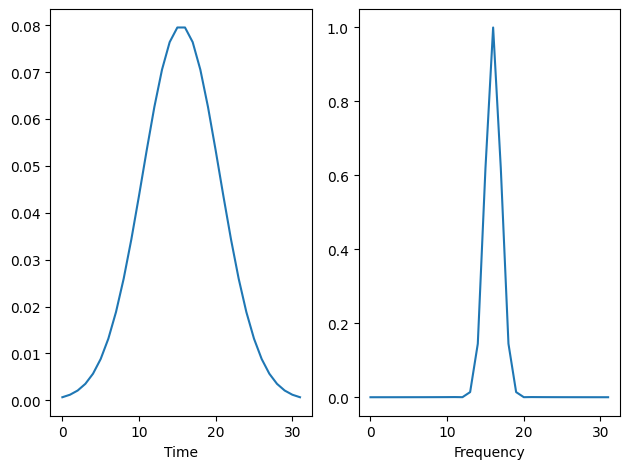

In [72]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.windows.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

# slider = widgets.FloatSlider(min=0.1, max=10, value=2)
# interact(plot_gaussian, std=slider);
plot_gaussian(5)

При увеличении стандартного отклонения (std) гауссова окна без увеличения числа элементов в окне (M) гауссово окно станет более "плоским" и широким, но так как количество элементов (M) остаётся прежним, окно будет охватывать меньшую часть гауссовой кривой, а его БПФ станет более узким. Таким образом, существует обратная зависимость между стандартными отклонениями f и F

## Задание 8.3.

 В дополнение к Гауссову окну создать окно Хемминга тех же размеров. Дополнить окно нулями и напечатать его ДПФ. Определить какое окно больше подходит для фильтра НЧ? Напечатать ДПФ с логарифмическим масштабом по y.  

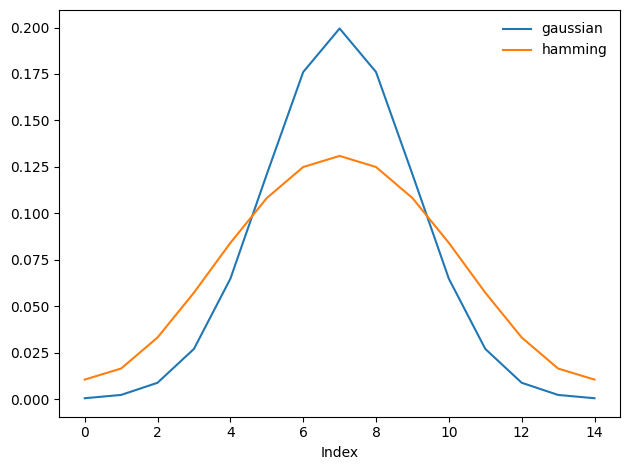

In [66]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)
M = 15
std = 2

gaussian = scipy.signal.windows.gaussian(M=M, std=std)
hamming = np.hamming(M)


windows = [gaussian, hamming]
names = ['gaussian','hamming']

for window in windows:
    window /= sum(window)
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

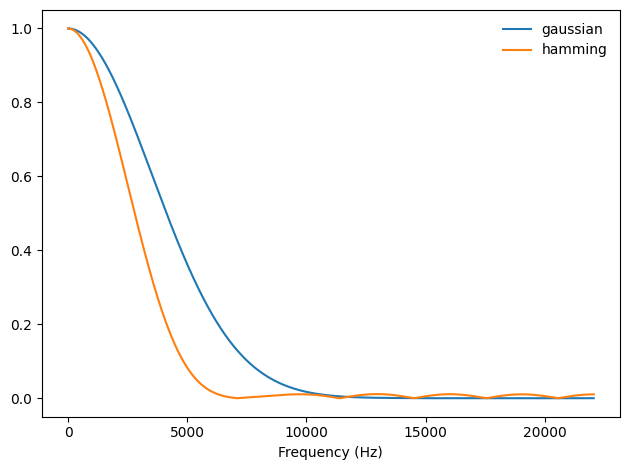

In [67]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Можно заметить, что Хэмминг падает быстрее и имеет заметные боковые лепестки, в отличие от Гаусса.

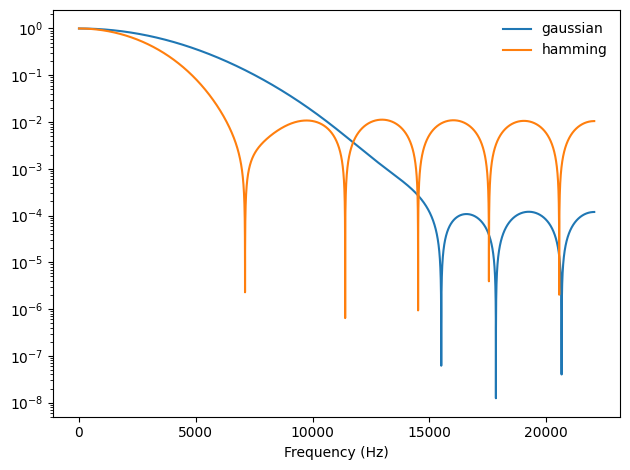

In [68]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

В логарифмическом масштабе мы можем видеть, что сначала значения Хэмминга уменьшаются быстрее, чем Гаусс.

Окно Гаусса лучше подходит для НЧ-фильтра, так как оно обеспечивает меньшее влияние боковых лепестков и более плавное затухание в полосе задерживания. Хэмминг может быть полезен в задачах, где требуется более резкий переход между полосами, но для НЧ-фильтрации его боковые лепестки делают его менее предпочтительным.